In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [159]:
df=pd.read_csv("Titanic-Dataset.csv")

In [160]:
print(df.shape)

(891, 12)


In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [164]:
# Drop PassengerID for modeling
# Use survived directly (as it is binary classification)
# One hot encoding for Pclass
# drop Name for modeling or segregating name into rare, miss, mrs but woon't work if some thing else came so instead can we drop it or make use of it
# Label encoding for Sex
# median for age null values
# then categorize age into 4 categories
# SibSp and Parch into family size
# remove ticket

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64


Text(0.5, 1.0, 'Missing Value Heatmap')

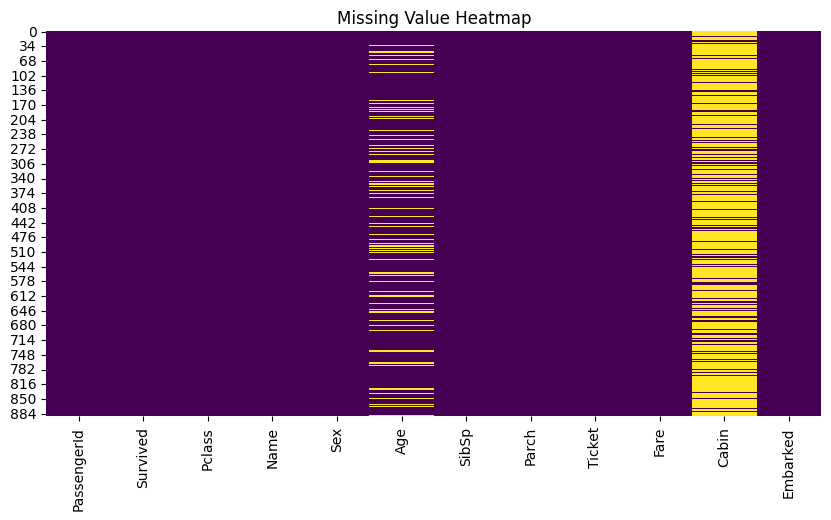

In [165]:
missing=df.isnull().mean().sort_values(ascending=False)*100
print(missing)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Value Heatmap")

Text(0.5, 1.0, 'Distribution of Survival')

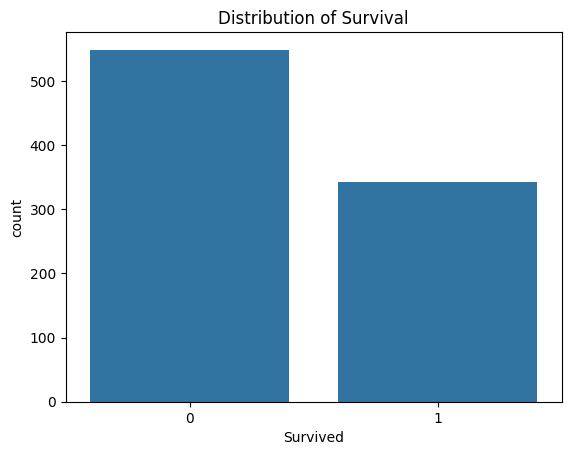

In [166]:
sns.countplot(data=df, x='Survived')
plt.title("Distribution of Survival")

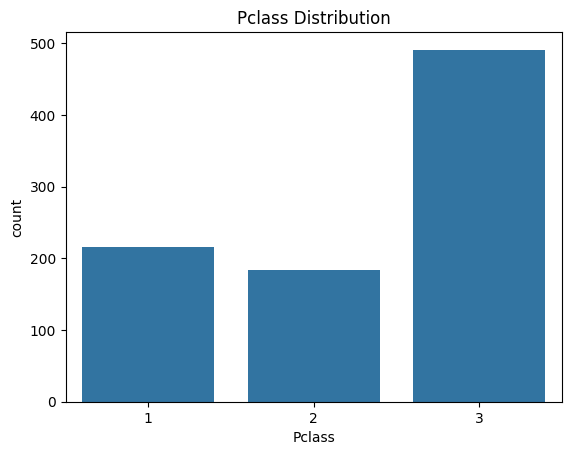

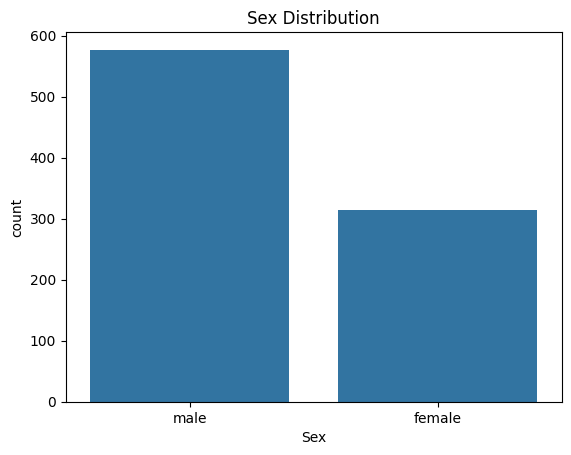

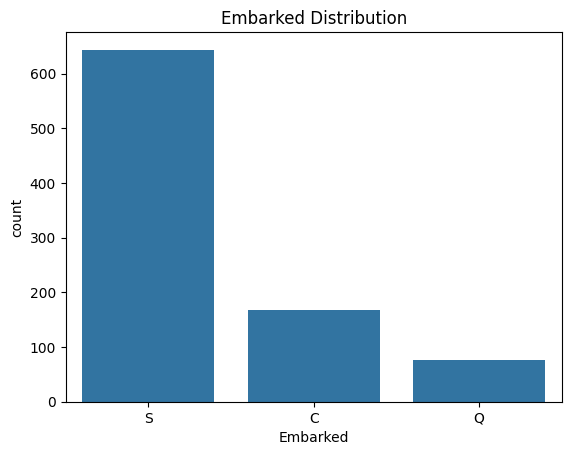

Text(0, 0.5, 'Count')

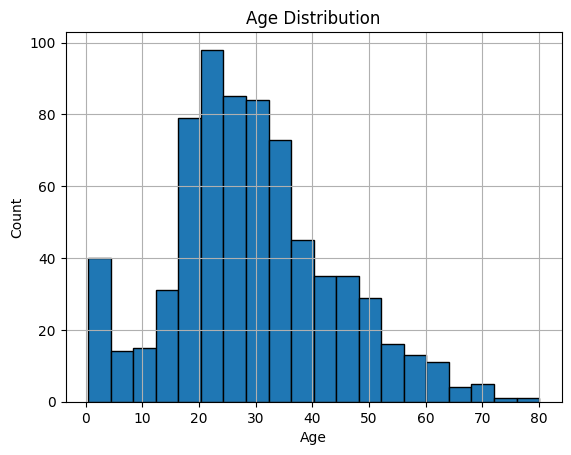

In [167]:
for col in ['Pclass', 'Sex', 'Embarked']:
  sns.countplot(data=df,x=col)
  plt.title(f"{col} Distribution")
  plt.show()
df['Age'].hist(bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0.5, 1.0, 'Age vs Survived')

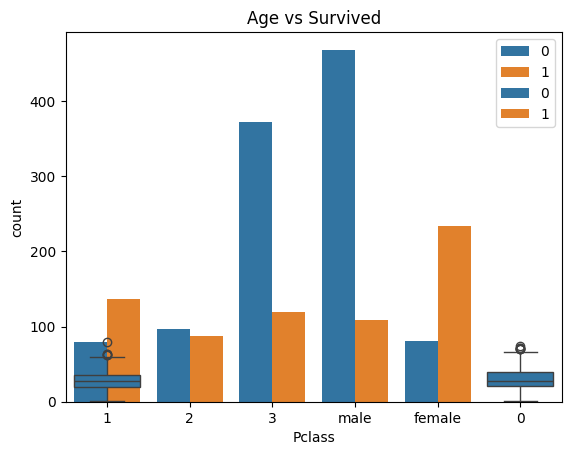

In [168]:
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Pclass vs Survival")
sns.countplot(data=df, x="Sex", hue='Survived')
plt.title("Sex vs Survived")
sns.boxplot(data=df, x="Survived", y='Age')
plt.title("Age vs Survived")

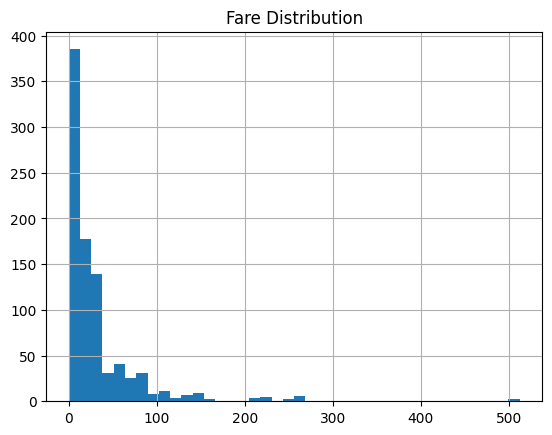

In [169]:
df['Fare'].hist(bins=40)
plt.title("Fare Distribution")
plt.show()


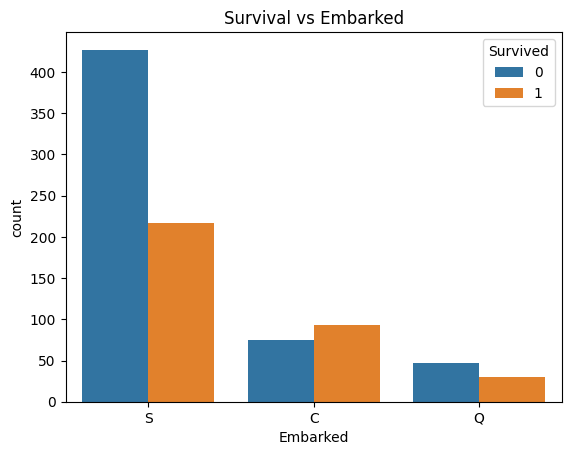

In [170]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival vs Embarked")
plt.show()


In [171]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_counts = df['Title'].value_counts()
print(title_counts)

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [172]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
               'Major', 'Rev', 'Sir', 'Jonkheer']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [173]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['AgeBand']=pd.cut(df['Age'],5)
df['AgeGroup']=pd.cut(df['Age'], bins=[0,10,18,35,60,100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

In [174]:
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone']=(df['FamilySize']==1).astype(int)

In [175]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [176]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df=pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [177]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())
df['FareBand'] = pd.qcut(df['Fare'], 4)


In [178]:
df['Cabin'] = df['Cabin'].fillna('U')
df['CabinLetter'] = df['Cabin'].str[0]

In [179]:
df.drop(['Ticket'], axis=1, inplace=True)


In [180]:
df.drop(['Name', 'PassengerId', 'Cabin', 'AgeBand', 'FareBand'], axis=1, inplace=True)

# One-hot encode: Pclass, Title, AgeGroup, CabinLetter
df = pd.get_dummies(df, columns=['Pclass', 'Title', 'AgeGroup', 'CabinLetter'], drop_first=True)

df.head()


,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,...,AgeGroup_Adult,AgeGroup_Senior,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U
0,0,0,22.0,1,0,7.2500,2,0,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,2,0,False,False,...,True,False,False,True,False,False,False,False,False,False
2,1,1,26.0,0,0,7.9250,1,1,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,2,0,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0,0,35.0,0,0,8.0500,1,1,False,True,...,False,False,False,False,False,False,False,False,False,True


In [181]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [182]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [196]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [198]:
xgb=XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [199]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svm = svc.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [200]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [201]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



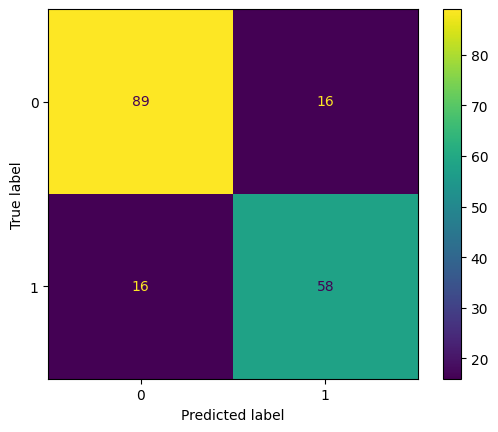

In [202]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

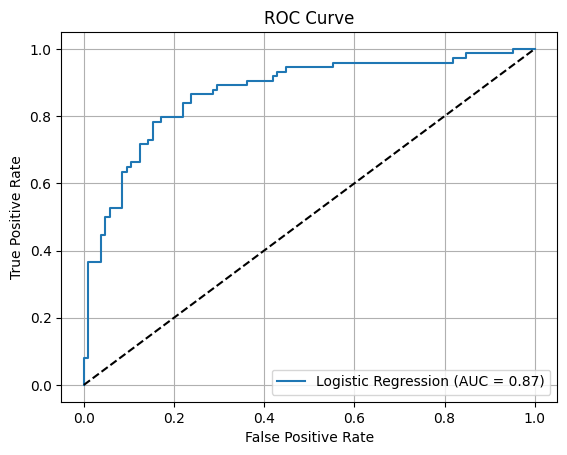

In [204]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

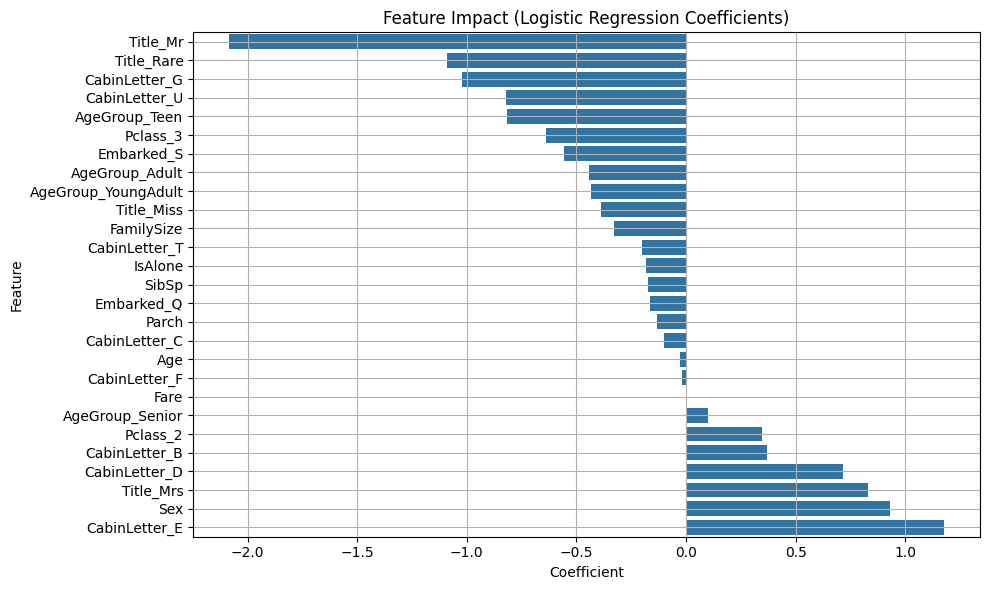

In [205]:
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient')

plt.figure(figsize=(10,6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title('Feature Impact (Logistic Regression Coefficients)')
plt.grid(True)
plt.tight_layout()
plt.show()